Root Mean Squared Error: 256628.736952139


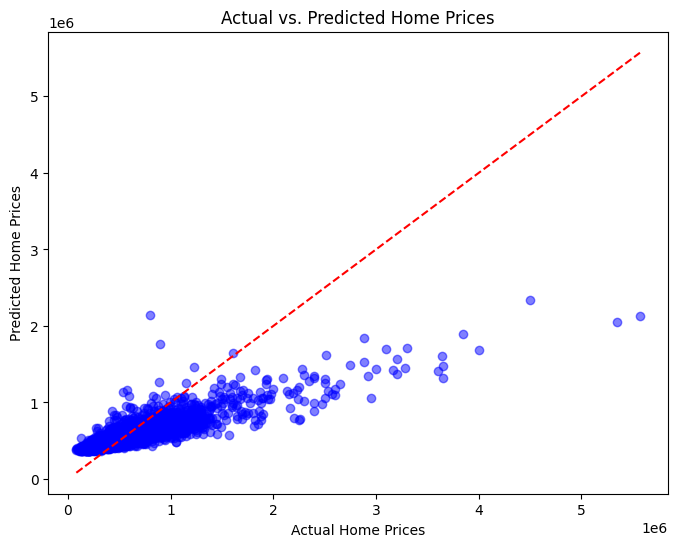

<Figure size 1000x600 with 0 Axes>

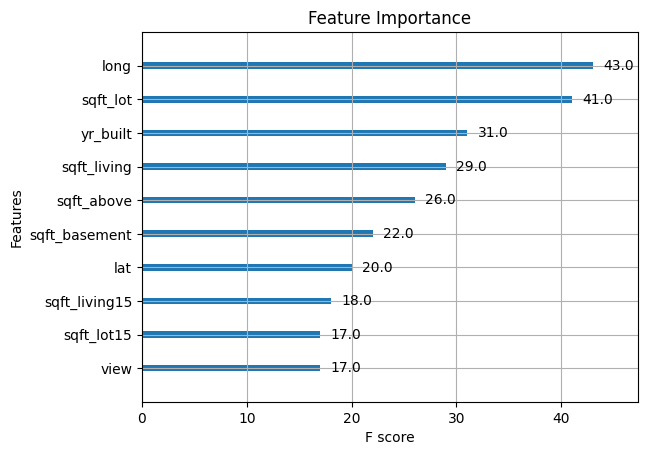

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset (replace 'data.csv' with your dataset)
data = pd.read_csv('kc_house_data.csv')

# Select relevant columns for prediction
selected_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                    'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                    'sqft_living15', 'sqft_lot15', 'price']
data = data[selected_columns]

# Drop rows with missing values
data = data.dropna()

# Split data into features (X) and target variable (y)
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

# Predictions
y_pred = xg_reg.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Plot actual vs. predicted home prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title("Actual vs. Predicted Home Prices")
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xg_reg, max_num_features=10)  # Plot the top 10 most important features
plt.title("Feature Importance")
plt.show()